data sourse: https://data.gov.ua/dataset/06779371-308f-42d7-895e-5a39833375f0/resource/01323740-88df-46c2-b06e-fbb58c89fe17

In [1]:
# see first 3 lines of a file without time-memory consuming operations
raw = open('../../Downloads/Транспорт.csv')
next(raw), next(raw), next(raw)
# remember: open(..) returns iterator
# I use this to determine separator

('person;reg_addr_koatuu;oper_code;oper_name;d_reg;dep_code;dep;brand;model;make_year;color;kind;body;purpose;fuel;capacity;own_weight;total_weight;n_reg_new\n',
 'P;1210436900;440;"440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО РЕЄСТРАЦIЮ";2018-01-01;1244;"ТСЦ 1244";"ВАЗ  2101";2101;1980;БІЛИЙ;ЛЕГКОВИЙ;СЕДАН-B;ЗАГАЛЬНИЙ;БЕНЗИН;1198;955;1355;6485ДПП\n',
 'P;3522855100;540;"540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ";2018-01-03;3541;"ТСЦ 3541";"ЗАЗ  110557";110557;2007;БІЛИЙ;ЛЕГКОВИЙ;ПІКАП-В;ЗАГАЛЬНИЙ;БЕНЗИН;1197;831;1190;NULL\n')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'0.23.0'

In [3]:
tr = pd.read_csv('../../Downloads/Транспорт.csv', error_bad_lines=False, sep=';')
tr.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,color,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new
0,P,1.210437e+09,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО ...,2018-01-01,1244,ТСЦ 1244,ВАЗ 2101,2101,1980,БІЛИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1198.0,955.0,1355.0,6485ДПП
1,P,3.522855e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-01-03,3541,ТСЦ 3541,ЗАЗ 110557,110557,2007,БІЛИЙ,ЛЕГКОВИЙ,ПІКАП-В,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,831.0,1190.0,NaN
2,P,7.120982e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,MAZDA 3,3,2006,СІРИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1200.0,1830.0,СА9073СА
3,P,2.124487e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,2142,ТСЦ 2142,MERCEDES-BENZ E 220 CDI,E 220 CDI,2011,ЧОРНИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2143.0,1615.0,2090.0,АО7474ВО
4,P,7.123410e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,БОГДАН 211140,211140,2014,ЧОРНИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1596.0,1110.0,1580.0,СА1806СВ


In [4]:
print( "num of fields: {1}, num of records: {0}".format(*tr.shape),"\nnum of cells:", tr.size,)

num of fields: 19, num of records: 1022724 
num of cells: 19431756


# Colors

In [5]:
import numpy as np


In [6]:
colors = np.array(tr['color'].values)

In [7]:
colors[:10] # see first 10 colors

array(['БІЛИЙ', 'БІЛИЙ', 'СІРИЙ', 'ЧОРНИЙ', 'ЧОРНИЙ', 'СІРИЙ', 'ЧЕРВОНИЙ',
       'БІЛИЙ', 'СІРИЙ', 'БІЛИЙ'], dtype=object)

In [8]:
np.setdiff1d(colors,[]) # unique elements = unique colors

array(['БІЛИЙ', 'БЕЖЕВИЙ', 'ЖОВТИЙ', 'ЗЕЛЕНИЙ', 'КОРИЧНЕВИЙ',
       'НЕВИЗНАЧЕНИЙ', 'ОРАНЖЕВИЙ', 'СІРИЙ', 'СИНІЙ', 'ФІОЛЕТОВИЙ',
       'ЧЕРВОНИЙ', 'ЧОРНИЙ'], dtype=object)

In [9]:
years = tr['make_year'].values

In [10]:
2018 - np.min(years) # the oldest car is yo

118

In [11]:
tr.dtypes

person              object
reg_addr_koatuu    float64
oper_code            int64
oper_name           object
d_reg               object
dep_code             int64
dep                 object
brand               object
model               object
make_year            int64
color               object
kind                object
body                object
purpose             object
fuel                object
capacity           float64
own_weight         float64
total_weight       float64
n_reg_new           object
dtype: object

In [12]:
tr.isnull().sum()

person                 0
reg_addr_koatuu        1
oper_code              0
oper_name              0
d_reg                  0
dep_code               0
dep                    0
brand                  0
model                  0
make_year              0
color                  0
kind                   0
body                   0
purpose                0
fuel               60659
capacity           65911
own_weight            43
total_weight           4
n_reg_new           9240
dtype: int64

In [13]:
# count new beige cars
len(tr[tr.color == 'БЕЖЕВИЙ']), 


(35900,)

# Operations

In [14]:
ops = tr['oper_name']
unique_ops = np.setdiff1d(ops,[]) # unique operation names
ops_count = []
for op in unique_ops:
    ops_count.append([op, len(ops[ops == op])])

In [15]:
ops_count

[['10 - РЕЄСТРАЦIЯ ТЗ ПО АКТУ ПРИЙМАННЯ ПЕРЕДАЧІ(ДОД.2)', 2],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  979],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, УСТАНОВИ',
  4],
 ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  92485],
 ['101 - РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ ЛІЗИНГУ', 3871],
 ['105 - ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
  985],
 ['11 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ДЛЯ ІНШИХ ОРГ. ДЕРЖ.ВЛАСНОСТІ', 2],
 ['110 - РЕЄСТРАЦIЯ ТЗ ОТРИМАНОГО ЧЕРЕЗ ВIДДIЛ СОЦ. ЗАХИСТУ', 125],
 ['13 -  ВИПРАВЛЕННЯ VIN-КОДУ (ПІСЛЯ ВИПРАВЛЕННЯ КАРТКУ ВИДАЛИТИ)', 4827],
 ['130 - РЕЄСТРАЦIЯ ТЗ У ЗВ`ЯЗКУ З ПРИЇЗДОМ НА ПМЖ ', 140],
 ["131 - РЕЄСТРАЦІЯ ТЗ У ЗВ'ЯЗКУ З ПРИЇЗДОМ НА ПМП В МЕЖАХ УКРАЇНИ", 2],
 ['140 - ВТОРИННА РЕЄСТРАЦIЯ ТЗ У ЗВ`ЯЗКУ З НЕПРОДАЖЕМ', 714],
 ['141 - РЕЄСТРАЦIЯ ТЗ ПIСЛЯ ВIДМIНИ ЇЇ АНУЛЮВАННЯ', 22],

In [16]:
ops_count_df = pd.DataFrame(ops_count, columns=["op","count"])

In [17]:
ops_count_df.head() 

,op,count
0,10 - РЕЄСТРАЦIЯ ТЗ ПО АКТУ ПРИЙМАННЯ ПЕРЕДАЧІ(...,2
1,100 - ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ...,979
2,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,4
3,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,92485
4,101 - РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ ЛІЗИНГУ,3871


In [18]:
# sort agreements by popularity
ops_count_df_sorted = ops_count_df.sort_values('count', ascending=False)
ops_count_df_sorted.head()

,op,count
40,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,261111
34,308 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ...,145530
3,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,92485
66,400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI ДЛЯ РО...,86143
97,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,69081


In [19]:
ops_count_df_sorted.values

array([['315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ',
        261111],
       ['308 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)',
        145530],
       ['100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ',
        92485],
       ['400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI ДЛЯ РОБОТИ НА ГАЗОВОМУ ПАЛЬНОМУ',
        86143],
       ['530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ', 69081],
       ['172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕЗЕНО З-ЗА КОРДОНУ',
        66332],
       ['48 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ ПО ДОГ. КУП.-ПРОД. УКЛАД. В ТСЦ (ПІСЛЯ 530 АБО 531)',
        34019],
       ['40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ',
        31813],
       ['440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО РЕЄСТРАЦIЮ',
        24689],
       ['69 - РЕЄСТРАЦІЯ ТЗ ПО АКТУ ПРИЙОМУ-ПЕРЕДАЧІ', 16214],
       ['340 - ПЕРЕРЕЄСТРАЦIЯ У ЗВ`ЯЗКУ ЗI ЗМIНОЮ АНКЕТНИХ ДАНИХ ВЛАСНИКА',
        14875],


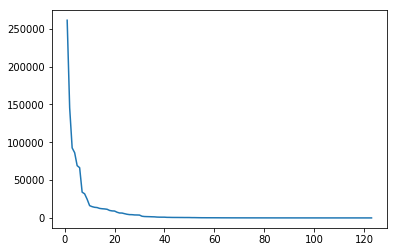

In [20]:
counts = ops_count_df_sorted['count'].values
index_num = np.arange(1,len(ops_count_df_sorted)+1)
plt.plot(index_num, counts) # type of agrement and number of agrements distribution
# Distribution poison or y = X/a+bX?
# X - index number of a type in th sorted array
# y - number of records for a type with index X
# apply linear regression for
X = index_num
y = np.array(counts)

(array([], dtype=int64),)


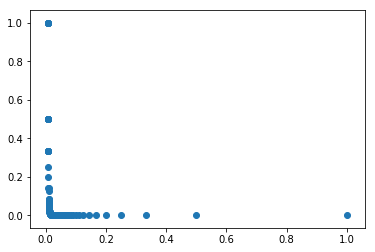

In [21]:
# 1/y = b + a*1/X <=> y' = b + aX', where y'=1/y and X'=1/X
# we should remove all zero counts

index_0 = np.where(X == 0) # I needed that to figure out where I will divide by 0
print(index_0) # empty array
y_r = 1./y
X_r = 1./X
plt.scatter(X_r, y_r)
# estimate values a and b:

# X_r, y_r, X*X_r, y*y_r # check

Coefs:
 [[-0.33638023]]
intercept:
 [0.12462553]


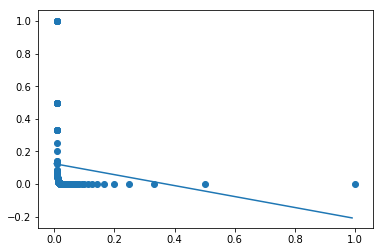

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_r[:,None], y_r[:,None])

print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)

# thus
b = regr.intercept_
a = regr.coef_
# Xest = np.arange(0,2,0.1)

prediction = lambda X: regr.intercept_ + (X * regr.coef_)

Xest = np.arange(0,1,0.01)
plt.plot(Xest, prediction(Xest)[0])
plt.scatter(X_r, y_r)

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.207e+02, 1.208e+02,
       1.209e+02])

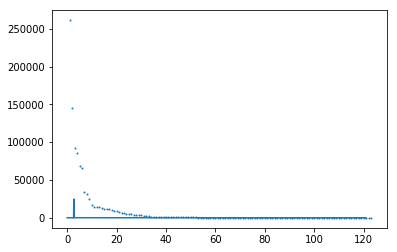

In [23]:
# thus
b = regr.intercept_
a = regr.coef_
Xest = np.arange(0,121,0.1)
yest = Xest/(a+b*Xest)[0]
plt.plot(Xest, yest)
plt.scatter(index_num, counts, s=1) # type of agrement and number of agrements distribution

Xest

# Aside

In [24]:
X = np.arange(1, 101)
eps = np.random.rand(100)/2
import random
y = X/(-1-0.2*X) + eps

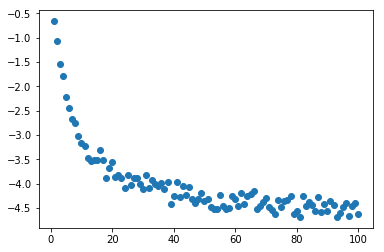

In [25]:
plt.scatter(X, y)

(array([], dtype=int64),)


(array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
        0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
        0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
        0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
        0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
        0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
        0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
        0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
        0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
        0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
        0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
        0.01408451, 0.01388889, 0.01369863, 0.01

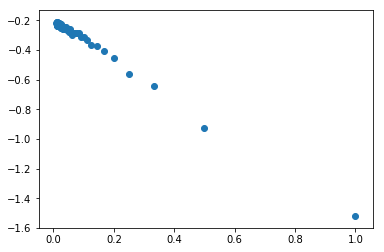

In [26]:
# 1/y = b + a*1/X <=> y' = b + aX', where y'=1/y and X'=1/X
# we should remove all zero counts

index_0 = np.where(X == 0) # I needed that to figure out where I will divide by 0
print(index_0) # empty array
y_r = 1./y
X_r = 1./X
plt.scatter(X_r, y_r)
# estimate values a and b:

X_r, y_r, X*X_r, y*y_r # check

Coefs:
 [[-1.32721858]]
intercept:
 [-0.20510048]


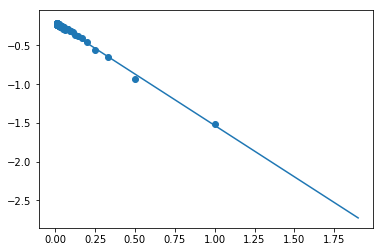

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_r[:,None], y_r[:,None])
print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)

# thus
b = regr.intercept_
a = regr.coef_
Xest = np.arange(0,2,0.1)

prediction = lambda X: regr.intercept_ + (X * regr.coef_)
plt.plot(Xest, prediction(Xest)[0])
plt.scatter(X_r, y_r)

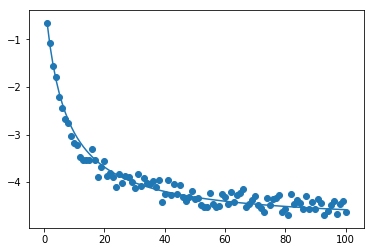

In [28]:
# thus
Xest = np.arange(1, 101)
yest = X/(a+b*X)[0]
plt.plot(Xest,yest)

plt.scatter(X,y)

# Registration

In [29]:
rereg = '100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ'

In [30]:
index_rereg = np.where(tr['oper_name']==rereg)[0]

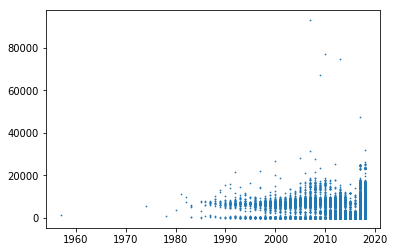

In [31]:
plt.scatter(tr['make_year'].values[index_rereg], tr['own_weight'].values[index_rereg], s=0.5)

# Fuel

In [32]:
tr.dtypes

person              object
reg_addr_koatuu    float64
oper_code            int64
oper_name           object
d_reg               object
dep_code             int64
dep                 object
brand               object
model               object
make_year            int64
color               object
kind                object
body                object
purpose             object
fuel                object
capacity           float64
own_weight         float64
total_weight       float64
n_reg_new           object
dtype: object

In [33]:
print(tr[tr.fuel == 'ДИЗЕЛЬНЕ ПАЛИВО'].purpose.value_counts())

# 97% of general purpose cars run on gasoline
print(tr[tr.fuel == 'БЕНЗИН'].purpose.value_counts(normalize=True))

ЗАГАЛЬНИЙ          211020
СПЕЦІАЛІЗОВАНИЙ     87074
СПЕЦІАЛЬНИЙ          3065
Name: purpose, dtype: int64
ЗАГАЛЬНИЙ          0.973897
СПЕЦІАЛІЗОВАНИЙ    0.023692
СПЕЦІАЛЬНИЙ        0.002412
Name: purpose, dtype: float64


In [34]:
tr.loc[tr.fuel == 'БЕНЗИН АБО ГАЗ', 'purpose'].value_counts(normalize=True)

ЗАГАЛЬНИЙ          0.967327
СПЕЦІАЛІЗОВАНИЙ    0.031616
СПЕЦІАЛЬНИЙ        0.001058
Name: purpose, dtype: float64

In [35]:
tr.loc[tr.purpose == 'ЗАГАЛЬНИЙ', 'fuel'].value_counts(normalize=True)

БЕНЗИН                         0.425859
БЕНЗИН АБО ГАЗ                 0.316401
ДИЗЕЛЬНЕ ПАЛИВО                0.247524
ЕЛЕКТРО                        0.005886
ЕЛЕКТРО АБО БЕНЗИН             0.003531
ГАЗ                            0.000343
НЕ ВИЗНАЧЕНО                   0.000291
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО    0.000117
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ        0.000027
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО        0.000021
Name: fuel, dtype: float64

In [36]:
tr.groupby('purpose').fuel.value_counts(normalize=True)

purpose          fuel                       
ЗАГАЛЬНИЙ        БЕНЗИН                         0.425859
                 БЕНЗИН АБО ГАЗ                 0.316401
                 ДИЗЕЛЬНЕ ПАЛИВО                0.247524
                 ЕЛЕКТРО                        0.005886
                 ЕЛЕКТРО АБО БЕНЗИН             0.003531
                 ГАЗ                            0.000343
                 НЕ ВИЗНАЧЕНО                   0.000291
                 ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО    0.000117
                 ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ        0.000027
                 БЕНЗИН, ГАЗ АБО ЕЛЕКТРО        0.000021
СПЕЦІАЛІЗОВАНИЙ  ДИЗЕЛЬНЕ ПАЛИВО                0.827094
                 БЕНЗИН                         0.083893
                 БЕНЗИН АБО ГАЗ                 0.083741
                 НЕ ВИЗНАЧЕНО                   0.002242
                 ЕЛЕКТРО                        0.001330
                 ЕЛЕКТРО АБО БЕНЗИН             0.001159
                 ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ   

In [37]:
tr.fuel.value_counts(normalize=True)

БЕНЗИН                         0.387485
ДИЗЕЛЬНЕ ПАЛИВО                0.313034
БЕНЗИН АБО ГАЗ                 0.289845
ЕЛЕКТРО                        0.005361
ЕЛЕКТРО АБО БЕНЗИН             0.003260
НЕ ВИЗНАЧЕНО                   0.000503
ГАЗ                            0.000317
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО    0.000104
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ        0.000072
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО        0.000019
Name: fuel, dtype: float64

In [38]:
tr.groupby(['kind', 'purpose']).color.value_counts(normalize=True)

kind            purpose          color       
АВТОБУС         ЗАГАЛЬНИЙ        БІЛИЙ           0.509562
                                 ЖОВТИЙ          0.229489
                                 ЗЕЛЕНИЙ         0.071074
                                 СИНІЙ           0.060891
                                 СІРИЙ           0.045823
                                 ЧЕРВОНИЙ        0.036054
                                 БЕЖЕВИЙ         0.026368
                                 ОРАНЖЕВИЙ       0.006251
                                 ЧОРНИЙ          0.006085
                                 КОРИЧНЕВИЙ      0.004264
                                 ФІОЛЕТОВИЙ      0.004098
                                 НЕВИЗНАЧЕНИЙ    0.000041
                СПЕЦІАЛІЗОВАНИЙ  БІЛИЙ           0.450000
                                 ЖОВТИЙ          0.320455
                                 СИНІЙ           0.111364
                                 ЗЕЛЕНИЙ         0.043182
                          

In [39]:
tr.isnull().sum()

person                 0
reg_addr_koatuu        1
oper_code              0
oper_name              0
d_reg                  0
dep_code               0
dep                    0
brand                  0
model                  0
make_year              0
color                  0
kind                   0
body                   0
purpose                0
fuel               60659
capacity           65911
own_weight            43
total_weight           4
n_reg_new           9240
dtype: int64

# How many cars can drive on natural gas? 

In [40]:
tr.fuel.value_counts(dropna=True)

БЕНЗИН                         372786
ДИЗЕЛЬНЕ ПАЛИВО                301159
БЕНЗИН АБО ГАЗ                 278850
ЕЛЕКТРО                          5158
ЕЛЕКТРО АБО БЕНЗИН               3136
НЕ ВИЗНАЧЕНО                      484
ГАЗ                               305
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО       100
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ            69
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО            18
Name: fuel, dtype: int64

## New field in a dataframe

In [41]:
tr['only_gas'] = tr.fuel == 'ГАЗ'

In [42]:
tr['gas'] = tr.fuel.str.contains('ГАЗ')

In [43]:
tr.gas.sum(), tr.gas.dtype

(279242, dtype('O'))

In [44]:
tr.only_gas.mean(), 305/(1022419 + 305), tr.only_gas.value_counts()

(0.00029822317653638715, 0.00029822317653638715, False    1022419
 True         305
 Name: only_gas, dtype: int64)

0.03% of cars run only on gas

In [45]:
tr.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas
0,P,1.210437e+09,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО ...,2018-01-01,1244,ТСЦ 1244,ВАЗ 2101,2101,1980,...,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1198.0,955.0,1355.0,6485ДПП,False,False
1,P,3.522855e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-01-03,3541,ТСЦ 3541,ЗАЗ 110557,110557,2007,...,ЛЕГКОВИЙ,ПІКАП-В,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,831.0,1190.0,NaN,False,False
2,P,7.120982e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,MAZDA 3,3,2006,...,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1200.0,1830.0,СА9073СА,False,False
3,P,2.124487e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,2142,ТСЦ 2142,MERCEDES-BENZ E 220 CDI,E 220 CDI,2011,...,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2143.0,1615.0,2090.0,АО7474ВО,False,False
4,P,7.123410e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,БОГДАН 211140,211140,2014,...,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1596.0,1110.0,1580.0,СА1806СВ,False,True


In [46]:
tr.gas.mean(), 279242/(279242 + 682823), tr.gas.value_counts()

(0.29025273760088977, 0.29025273760088977, False    682823
 True     279242
 Name: gas, dtype: int64)

3% of cars can run on natural gas

In [47]:
tr.gas.value_counts(dropna=False)

False    682823
True     279242
NaN       60659
Name: gas, dtype: int64

There are sixty thousands cars with unknown fuel type

# Registration date

In [48]:
tr.d_reg.str.slice(5, 7).value_counts()

07    139749
05    139253
08    136772
06    135559
04    122982
03    122728
02    116604
01    109077
Name: d_reg, dtype: int64

Find the number of registrations during each month

In [49]:
combined = tr.d_reg.str.cat(tr.d_reg, sep=' ')
tr['d_reg_dt'] = pd.to_datetime(combined)

In [50]:
tr.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas,d_reg_dt
0,P,1.210437e+09,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО ...,2018-01-01,1244,ТСЦ 1244,ВАЗ 2101,2101,1980,...,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1198.0,955.0,1355.0,6485ДПП,False,False,2018-01-01 21:18:00
1,P,3.522855e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-01-03,3541,ТСЦ 3541,ЗАЗ 110557,110557,2007,...,ПІКАП-В,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,831.0,1190.0,NaN,False,False,2018-01-03 23:18:00
2,P,7.120982e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,MAZDA 3,3,2006,...,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1200.0,1830.0,СА9073СА,False,False,2018-01-03 23:18:00
3,P,2.124487e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,2142,ТСЦ 2142,MERCEDES-BENZ E 220 CDI,E 220 CDI,2011,...,СЕДАН-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2143.0,1615.0,2090.0,АО7474ВО,False,False,2018-01-03 23:18:00
4,P,7.123410e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,БОГДАН 211140,211140,2014,...,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1596.0,1110.0,1580.0,СА1806СВ,False,True,2018-01-03 23:18:00


# How does the number of natural gas powered cars change with the manufacture date?

In [51]:
tr.gas.mean()

0.29025273760088977

In [52]:
gas_count = tr.groupby('make_year').gas.count()
gas_count

make_year
1900        9
1928        1
1936        4
1937        2
1938        9
1939       12
1940        1
1941        1
1942        2
1943        5
1944        1
1945        1
1947        2
1948        1
1949        4
1950        6
1951       11
1952        9
1953       16
1954       42
1955       38
1956       24
1957       47
1958       49
1959       46
1960       58
1961       62
1962       66
1963       74
1964       92
        ...  
1989    10981
1990    12013
1991    11685
1992    12674
1993     9646
1994     9431
1995    11508
1996    10555
1997    10756
1998    15382
1999    15245
2000    15275
2001    16177
2002    19559
2003    27405
2004    35809
2005    45827
2006    63251
2007    87499
2008    95522
2009    15992
2010    33307
2011    55314
2012    54857
2013    51282
2014    30352
2015    20845
2016    17980
2017    45706
2018    40766
Name: gas, Length: 84, dtype: int64

In [53]:
year_gas_count = dict(gas_count)

In [54]:
year_gas_count.keys(), year_gas_count.values()

(dict_keys([1900, 1928, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]),
 dict_values([9, 1, 4, 2, 9, 12, 1, 1, 2, 5, 1, 1, 2, 1, 4, 6, 11, 9, 16, 42, 38, 24, 47, 49, 46, 58, 62, 66, 74, 92, 78, 107, 124, 137, 111, 125, 264, 551, 802, 1008, 1236, 1281, 1442, 1757, 1812, 2353, 2468, 3158, 3312, 3988, 5509, 7271, 9195, 10680, 10981, 12013, 11685, 12674, 9646, 9431, 11508, 10555, 10756, 15382, 15245, 15275, 16177, 19559, 27405, 35809, 45827, 63251, 87499, 95522, 15992, 33307, 55314, 54857, 51282, 30352, 20845, 17980, 45706, 40766]))

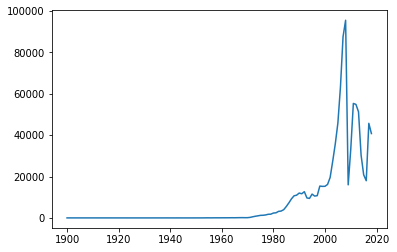

In [55]:
plt.plot(year_gas_count.keys(), year_gas_count.values())

In [56]:
len(tr.make_year.value_counts()), len(year_gas_count.values())

(84, 84)

In [57]:
count = tr.groupby('make_year').size()
count
tr['make_year'].value_counts()

2008    98079
2007    90653
2006    65424
2011    56493
2012    56247
2018    54513
2017    54335
2013    52235
2005    47758
2004    37744
2010    33919
2014    30894
2003    29011
2015    21542
2002    20963
2016    19213
2001    17712
1998    16879
2000    16754
2009    16714
1999    16586
1992    13607
1990    12832
1991    12694
1995    12323
1997    11740
1989    11713
1996    11325
1988    11287
1993    10519
        ...  
1965       79
1963       75
1962       66
1961       64
1960       59
1958       49
1959       47
1957       47
1954       42
1955       38
1956       24
1953       16
1939       12
1900       11
1951       11
1952        9
1938        9
1950        6
1943        5
1949        4
1936        4
1947        2
1942        2
1937        2
1948        1
1945        1
1944        1
1941        1
1940        1
1928        1
Name: make_year, Length: 84, dtype: int64

In [58]:
gas_count = tr.groupby('make_year').gas.count()
gas_count

make_year
1900        9
1928        1
1936        4
1937        2
1938        9
1939       12
1940        1
1941        1
1942        2
1943        5
1944        1
1945        1
1947        2
1948        1
1949        4
1950        6
1951       11
1952        9
1953       16
1954       42
1955       38
1956       24
1957       47
1958       49
1959       46
1960       58
1961       62
1962       66
1963       74
1964       92
        ...  
1989    10981
1990    12013
1991    11685
1992    12674
1993     9646
1994     9431
1995    11508
1996    10555
1997    10756
1998    15382
1999    15245
2000    15275
2001    16177
2002    19559
2003    27405
2004    35809
2005    45827
2006    63251
2007    87499
2008    95522
2009    15992
2010    33307
2011    55314
2012    54857
2013    51282
2014    30352
2015    20845
2016    17980
2017    45706
2018    40766
Name: gas, Length: 84, dtype: int64

In [59]:
gas_year_count_pers = gas_count/count
year_list, gas_persent = np.array(list(year_gas_count.keys())), gas_year_count_pers.values

(84, 84)

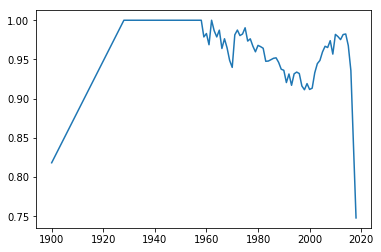

In [60]:
plt.plot(year_list, gas_persent)

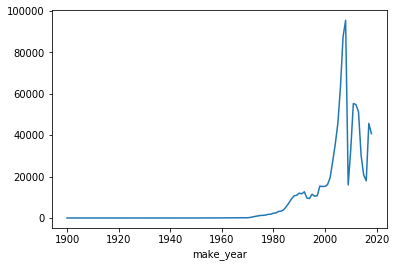

In [61]:
tr.groupby('make_year').gas.count().plot()

2008    98079
2007    90653
2006    65424
2011    56493
2012    56247
2018    54513
2017    54335
2013    52235
2005    47758
2004    37744
2010    33919
2014    30894
2003    29011
2015    21542
2002    20963
2016    19213
2001    17712
1998    16879
2000    16754
2009    16714
1999    16586
1992    13607
1990    12832
1991    12694
1995    12323
1997    11740
1989    11713
1996    11325
1988    11287
1993    10519
        ...  
1965       79
1963       75
1962       66
1961       64
1960       59
1958       49
1959       47
1957       47
1954       42
1955       38
1956       24
1953       16
1939       12
1900       11
1951       11
1952        9
1938        9
1950        6
1943        5
1949        4
1936        4
1947        2
1942        2
1937        2
1948        1
1945        1
1944        1
1941        1
1940        1
1928        1
Name: make_year, Length: 84, dtype: int64

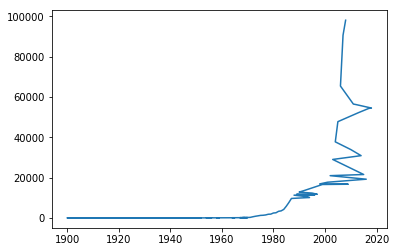

In [64]:
tr['make_year'].value_counts().plot()
# tr['make_year'].value_counts() has to be ordered by index, not by number of cars per year
tr['make_year'].value_counts()

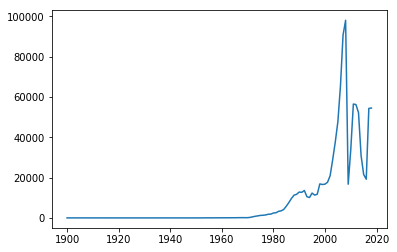

In [65]:
# sort by index
tr['make_year'].value_counts().sort_index().plot()

In [69]:
tr['fuel'].value_counts(dropna=False)

БЕНЗИН                         372786
ДИЗЕЛЬНЕ ПАЛИВО                301159
БЕНЗИН АБО ГАЗ                 278850
NaN                             60659
ЕЛЕКТРО                          5158
ЕЛЕКТРО АБО БЕНЗИН               3136
НЕ ВИЗНАЧЕНО                      484
ГАЗ                               305
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО       100
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ            69
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО            18
Name: fuel, dtype: int64

In [83]:
tr.loc[(tr['fuel'] == 'НЕ ВИЗНАЧЕНО') | (tr.fuel == 'NaN'), 'fuel'] = np.NaN # NaN is NOT a string
# alternatively
tr.fuel.replace(['НЕ ВИЗНАЧЕНО', 'NaN'], value=np.nan, inplace=True)

In [80]:
tr['fuel'].value_counts(dropna=False)

БЕНЗИН                         372786
ДИЗЕЛЬНЕ ПАЛИВО                301159
БЕНЗИН АБО ГАЗ                 278850
NaN                             61143
ЕЛЕКТРО                          5158
ЕЛЕКТРО АБО БЕНЗИН               3136
ГАЗ                               305
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО       100
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ            69
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО            18
Name: fuel, dtype: int64

# Get an actual brand

In [174]:
import re
re.sub('place', 'instead', 'this is place thing^')

'this is instead thing^'

In [175]:
def func(name):
    return re.sub(name.model, '', name.brand)

In [176]:
tr['actual_brand'] = tr[['brand', 'model']].apply(func, axis=1)

In [177]:
tr.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,purpose,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas,d_reg_dt,actual_brand
0,P,1.210437e+09,440,440 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО ...,2018-01-01,1244,ТСЦ 1244,ВАЗ 2101,2101,1980,...,ЗАГАЛЬНИЙ,БЕНЗИН,1198.0,955.0,1355.0,6485ДПП,False,False,2018-01-01 21:18:00,ВАЗ
1,P,3.522855e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-01-03,3541,ТСЦ 3541,ЗАЗ 110557,110557,2007,...,ЗАГАЛЬНИЙ,БЕНЗИН,1197.0,831.0,1190.0,NaN,False,False,2018-01-03 23:18:00,ЗАЗ
2,P,7.120982e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,MAZDA 3,3,2006,...,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1200.0,1830.0,СА9073СА,False,False,2018-01-03 23:18:00,MAZDA
3,P,2.124487e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,2142,ТСЦ 2142,MERCEDES-BENZ E 220 CDI,E 220 CDI,2011,...,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,2143.0,1615.0,2090.0,АО7474ВО,False,False,2018-01-03 23:18:00,MERCEDES-BENZ
4,P,7.123410e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-03,7142,ТСЦ 7142,БОГДАН 211140,211140,2014,...,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1596.0,1110.0,1580.0,СА1806СВ,False,True,2018-01-03 23:18:00,БОГДАН


In [181]:
tr.groupby('actual_brand').size().sort_values(ascending=False)

actual_brand
ВАЗ                120096
VOLKSWAGEN          71957
RENAULT             56008
MERCEDES-BENZ       55922
TOYOTA              44184
SKODA               36474
OPEL                31379
DAEWOO              31017
FORD                30155
ЗАЗ                 30026
HYUNDAI             29986
CHEVROLET           29137
NISSAN              26474
MITSUBISHI          24281
BMW                 21108
HONDA               20633
ГАЗ                 20080
AUDI                18977
KIA                 18603
MAZDA               16335
PEUGEOT             15478
FIAT                12580
CITROEN             10917
DAF                 10056
SUZUKI               8924
ЗАЗ-DAEWOO           8713
CHERY                8623
LEXUS                8273
MAN                  8209
VOLVO                7135
                    ...  
LAMBERT                 1
LAIKA                   1
KUHNWALDT               1
KROEGER                 1
KREIDLER                1
KOSTENER                1
KONTAR                  1

In [197]:
str(tr.actual_brand.values) # some values contain double spaces

"['ВАЗ  ' 'ЗАЗ  ' 'MAZDA  ' ... 'DAEWOO  ' 'ГАЗ  ' 'ВАЗ  ']"

In [201]:
tr['actual_brand'] = tr.actual_brand.apply(lambda w: re.sub(r'\s+', ' ', w))

In [202]:
str(tr.actual_brand.values) # values contain spaces at the end

"['ВАЗ ' 'ЗАЗ ' 'MAZDA ' ... 'DAEWOO ' 'ГАЗ ' 'ВАЗ ']"

In [203]:
# remove spaces at the end
tr['actual_brand'] = tr.actual_brand.apply(lambda w: re.sub(r' $', '', w))

In [214]:
tr[tr['actual_brand']=='BENTLEY']

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,purpose,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas,d_reg_dt,actual_brand
15877,J,5.110137e+09,430,430 - ПЕРЕРЕЄСТРАЦІЯ ПРИ ЗАМІНІ СВІДОЦТВА ПРО ...,2018-01-05,8047,ТСЦ 8047,BENTLEY BENTAYGA,BENTAYGA,2017,...,ЗАГАЛЬНИЙ,БЕНЗИН,5950.0,2515.0,3250.0,ВН0030НМ,False,False,2018-01-06 01:18:00,BENTLEY
19329,J,5.110137e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-01-06,5152,ТСЦ 5152,BENTLEY BENTAYGA,BENTAYGA,2017,...,ЗАГАЛЬНИЙ,БЕНЗИН,5950.0,2515.0,3250.0,16ВІ8224,False,False,2018-01-07 02:18:00,BENTLEY
22323,J,8.038000e+09,50,50 - ВТОРИННА РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ КУПIВ...,2018-01-10,5142,ТСЦ 5142,BENTLEY BENTAYGA,BENTAYGA,2017,...,ЗАГАЛЬНИЙ,БЕНЗИН,5950.0,2515.0,3250.0,АА0030ТК,False,False,2018-01-11 06:18:00,BENTLEY
31033,P,6.510400e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-11,8047,ТСЦ 8047,BENTLEY MULSANNE,MULSANNE,2012,...,ЗАГАЛЬНИЙ,БЕНЗИН,6752.0,2585.0,3090.0,ВТ7775ВХ,False,False,2018-01-12 07:18:00,BENTLEY
39767,P,8.038600e+09,308,308 - ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ...,2018-01-12,8046,ТСЦ 8046,BENTLEY CONTINENTAL,CONTINENTAL,2010,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,2235.0,2735.0,АА7000РТ,False,False,2018-01-13 08:18:00,BENTLEY
42586,P,2.310700e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-01-13,8046,ТСЦ 8046,BENTLEY CONTINENTAL,CONTINENTAL,2007,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,1950.0,2450.0,11ІК3500,False,False,2018-01-14 09:18:00,BENTLEY
44821,P,2.110100e+09,40,"40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГ...",2018-01-13,8047,ТСЦ 8047,BENTLEY CONTINENTAL,CONTINENTAL,2007,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,1950.0,2450.0,АО5550ЕМ,False,False,2018-01-14 09:18:00,BENTLEY
47544,P,8.039100e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-01-16,8047,ТСЦ 8047,BENTLEY CONTINENTAL,CONTINENTAL,2005,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,1950.0,2410.0,11ІІ7175,False,False,2018-01-17 12:18:00,BENTLEY
48452,P,8.036300e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-16,8045,ТСЦ 8045,BENTLEY CONTINENTAL,CONTINENTAL,2007,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,2475.0,3050.0,АА8885ТМ,False,False,2018-01-17 12:18:00,BENTLEY
50629,P,8.038600e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-01-16,8047,ТСЦ 8047,BENTLEY CONTINENTAL GT,CONTINENTAL GT,2011,...,ЗАГАЛЬНИЙ,БЕНЗИН,5998.0,2320.0,2750.0,11ІІ7189,False,False,2018-01-17 12:18:00,BENTLEY


In [218]:
tr[tr['actual_brand']=='MCLAREN'].n_reg_new.values

array(['АА0080ХН'], dtype=object)

In [225]:
dict(tr[tr['actual_brand']=='FORD'].groupby('model').size())

{'AEROSTAR': 8,
 'ASPIRE': 1,
 'B-MAX': 72,
 'BRONCO': 1,
 'C-MAX': 404,
 'C-MAX TREND': 58,
 'CAPRI': 3,
 'CARGO': 60,
 'CARGO 1824': 2,
 'CARGO 1826': 1,
 'CARGO 1830T': 23,
 'CARGO 1833': 8,
 'CARGO 1833 DC': 13,
 'CARGO 1842TXHR': 53,
 'CARGO 2533 SCK-22': 11,
 'CARGO 2533DC': 4,
 'CARGO 2533LR': 4,
 'CARGO 3430D': 9,
 'CARGO 3530': 4,
 'CARGO 3535': 3,
 'CARGO 3536D DC': 1,
 'CARGO 3542D': 53,
 'CARGO 4142D': 88,
 'CARGO KTFK 42': 4,
 'CLUB WAGON': 2,
 'CONNECT': 136,
 'CONSUL': 1,
 'CONTOUR': 3,
 'CONTOUR 2.0': 3,
 'CONTOUR 2.5': 2,
 'CORIER': 4,
 'CORTINA': 2,
 'COUGAR': 3,
 'COURIER': 56,
 'COURIER 1.8D': 11,
 'CROWN VICTORIA': 8,
 'CURIER': 3,
 'CUSTOM': 1,
 'E250': 3,
 'E350': 4,
 'ECONOLINE': 15,
 'ECONOLINE 350': 4,
 'ECONOVAN': 9,
 'ECOSPORT': 44,
 'EDGE': 285,
 'ESCAPE': 503,
 'ESCORT': 817,
 'ESCORT 1.4': 3,
 'ESCORT 1.8 D': 1,
 'ESCORT CLX': 34,
 'ESCORT RS': 1,
 'ESCORT RS TURBO': 1,
 'ESCORT VAN': 10,
 'EXCURSION': 1,
 'EXPEDITION': 11,
 'EXPLORER': 96,
 'EXPLORER 4.0

In [230]:
tr.loc[tr['model']=='MUSTANG']

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,purpose,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas,d_reg_dt,actual_brand
22298,P,4.610137e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-10,4641,ТСЦ 4641,FORD MUSTANG,MUSTANG,2017,...,ЗАГАЛЬНИЙ,БЕНЗИН,2300.0,1607.0,2720.0,ВС4040НВ,False,False,2018-01-11 06:18:00,FORD
38431,P,2.310700e+09,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2018-01-12,8045,ТСЦ 8045,FORD MUSTANG,MUSTANG,2016,...,ЗАГАЛЬНИЙ,БЕНЗИН,2300.0,1588.0,2041.0,АР1887ЕС,False,False,2018-01-13 08:18:00,FORD
41073,P,6.510700e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-13,6545,ТСЦ 6545,FORD MUSTANG,MUSTANG,2015,...,ЗАГАЛЬНИЙ,БЕНЗИН,2300.0,1602.0,2041.0,ВТ7136ВМ,False,False,2018-01-14 09:18:00,FORD
47105,P,6.310138e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-16,6341,ТСЦ 6341,FORD MUSTANG,MUSTANG,2015,...,ЗАГАЛЬНИЙ,БЕНЗИН,2269.0,1786.0,2087.0,АХ0302ЕР,False,False,2018-01-17 12:18:00,FORD
56185,P,8.038200e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-17,8041,ТСЦ 8041,FORD MUSTANG,MUSTANG,2015,...,ЗАГАЛЬНИЙ,БЕНЗИН,2264.0,1738.0,2041.0,АА2001ТЕ,False,False,2018-01-18 13:18:00,FORD
69981,P,8.036100e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-21,8046,ТСЦ 8046,FORD MUSTANG,MUSTANG,2016,...,ЗАГАЛЬНИЙ,БЕНЗИН,2264.0,1550.0,2041.0,АА8738ТЕ,False,False,2018-01-22 17:18:00,FORD
94403,P,8.036100e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-01-27,8046,ТСЦ 8046,FORD MUSTANG,MUSTANG,2013,...,ЗАГАЛЬНИЙ,БЕНЗИН,4951.0,1797.0,2297.0,11ІК3871,False,False,2018-01-28 23:18:00,FORD
101453,P,6.310136e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-01-30,8047,ТСЦ 8047,FORD MUSTANG,MUSTANG,2015,...,ЗАГАЛЬНИЙ,БЕНЗИН,2264.0,1602.0,2041.0,АХ0026ММ,False,False,2018-02-01 02:18:00,FORD
113295,P,8.036600e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-02-01,3246,ТСЦ 3246,FORD MUSTANG,MUSTANG,2014,...,ЗАГАЛЬНИЙ,БЕНЗИН,2264.0,1617.0,2041.0,АА7577МР,False,False,2018-02-01 21:18:00,FORD
114121,P,1.211038e+09,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2018-02-01,1248,ТСЦ 1248,FORD MUSTANG,MUSTANG,2017,...,ЗАГАЛЬНИЙ,БЕНЗИН,2264.0,1565.0,2087.0,АЕ0007МС,False,False,2018-02-01 21:18:00,FORD


# Age of different Ford models

In [232]:
tr[tr['actual_brand']=='FORD'].groupby('model').make_year.agg(['mean', 'count'])

,mean,count
model,,
AEROSTAR,1990.125000,8
ASPIRE,1996.000000,1
B-MAX,2013.375000,72
BRONCO,1990.000000,1
C-MAX,2010.772277,404
C-MAX TREND,2009.310345,58
CAPRI,1975.333333,3
CARGO,2010.016667,60
CARGO 1824,2008.000000,2


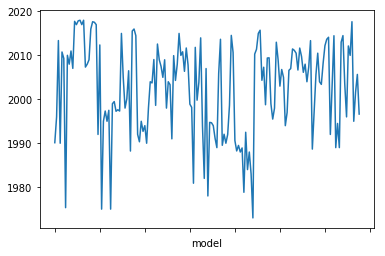

In [233]:
tr[tr['actual_brand']=='FORD'].groupby('model').make_year.mean().plot()

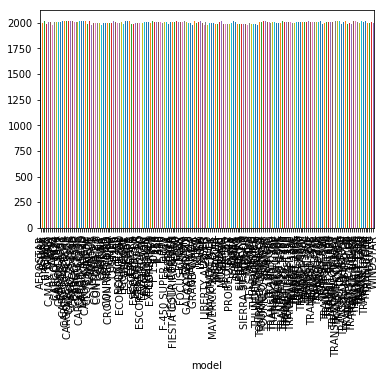

In [234]:
tr[tr['actual_brand']=='FORD'].groupby('model').make_year.mean().plot(kind='bar')

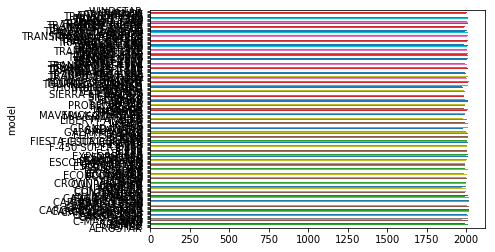

In [235]:
tr[tr['actual_brand']=='FORD'].groupby('model').make_year.mean().plot(kind='barh')

In [236]:
tr[tr['actual_brand']=='FORD'].groupby('model').make_year.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
AEROSTAR,8.0,1990.125000,2.900123,1986.0,1988.25,1991.0,1992.25,1993.0
ASPIRE,1.0,1996.000000,NaN,1996.0,1996.00,1996.0,1996.00,1996.0
B-MAX,72.0,2013.375000,0.591905,2012.0,2013.00,2013.0,2014.00,2015.0
BRONCO,1.0,1990.000000,NaN,1990.0,1990.00,1990.0,1990.00,1990.0
C-MAX,404.0,2010.772277,2.670048,2005.0,2008.00,2011.0,2013.00,2017.0
C-MAX TREND,58.0,2009.310345,2.129219,2007.0,2008.00,2008.0,2010.00,2014.0
CAPRI,3.0,1975.333333,13.650397,1966.0,1967.50,1969.0,1980.00,1991.0
CARGO,60.0,2010.016667,8.322914,1978.0,2007.00,2012.0,2016.00,2018.0
CARGO 1824,2.0,2008.000000,0.000000,2008.0,2008.00,2008.0,2008.00,2008.0


In [260]:
tr[tr['actual_brand']=='L'].groupby('model').make_year.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
430,1.0,2004.000000,NaN,2004.0,2004.00,2004.0,2004.00,2004.0
COUPE CAMBIOCORSA,2.0,2005.500000,0.707107,2005.0,2005.25,2005.5,2005.75,2006.0
GHIBLI,22.0,2014.545455,1.223861,2013.0,2014.00,2014.0,2015.00,2017.0
GHIBLI S Q4,4.0,2013.750000,0.957427,2013.0,2013.00,2013.5,2014.25,2015.0
GRANCABRIO,5.0,2010.000000,0.000000,2010.0,2010.00,2010.0,2010.00,2010.0
GRANSPORT,1.0,2006.000000,NaN,2006.0,2006.00,2006.0,2006.00,2006.0
GRANTURISMO,8.0,2012.500000,4.276180,2007.0,2008.00,2014.0,2014.75,2018.0
LEVANTE,41.0,2017.048780,0.773021,2016.0,2016.00,2017.0,2018.00,2018.0
QUATTROPORTE,27.0,2009.777778,4.245661,2004.0,2006.00,2007.0,2013.50,2018.0


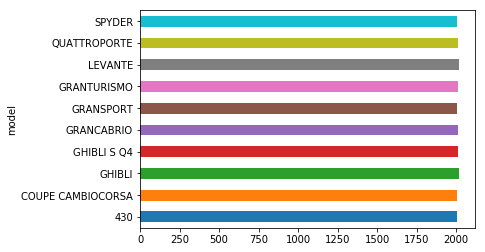

In [242]:
tr[tr['actual_brand']=='MASERLATI'].groupby('model').make_year.mean().plot(kind='barh')

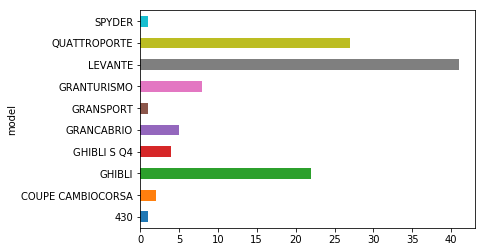

In [243]:
tr[tr['actual_brand']=='MASERATI'].groupby('model').size().plot(kind='barh')

# Car age

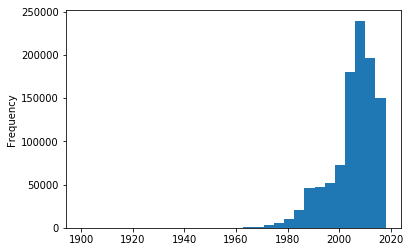

In [293]:
tr.make_year.plot(kind='hist', bins=30)

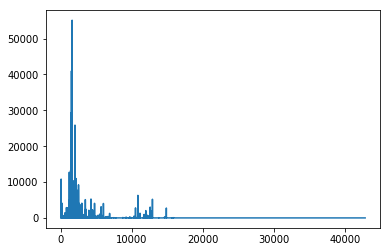

In [254]:
tr.capacity.value_counts().sort_index().plot() # how to build histogram with custom step??

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a50d54d30>,
      dtype=object)

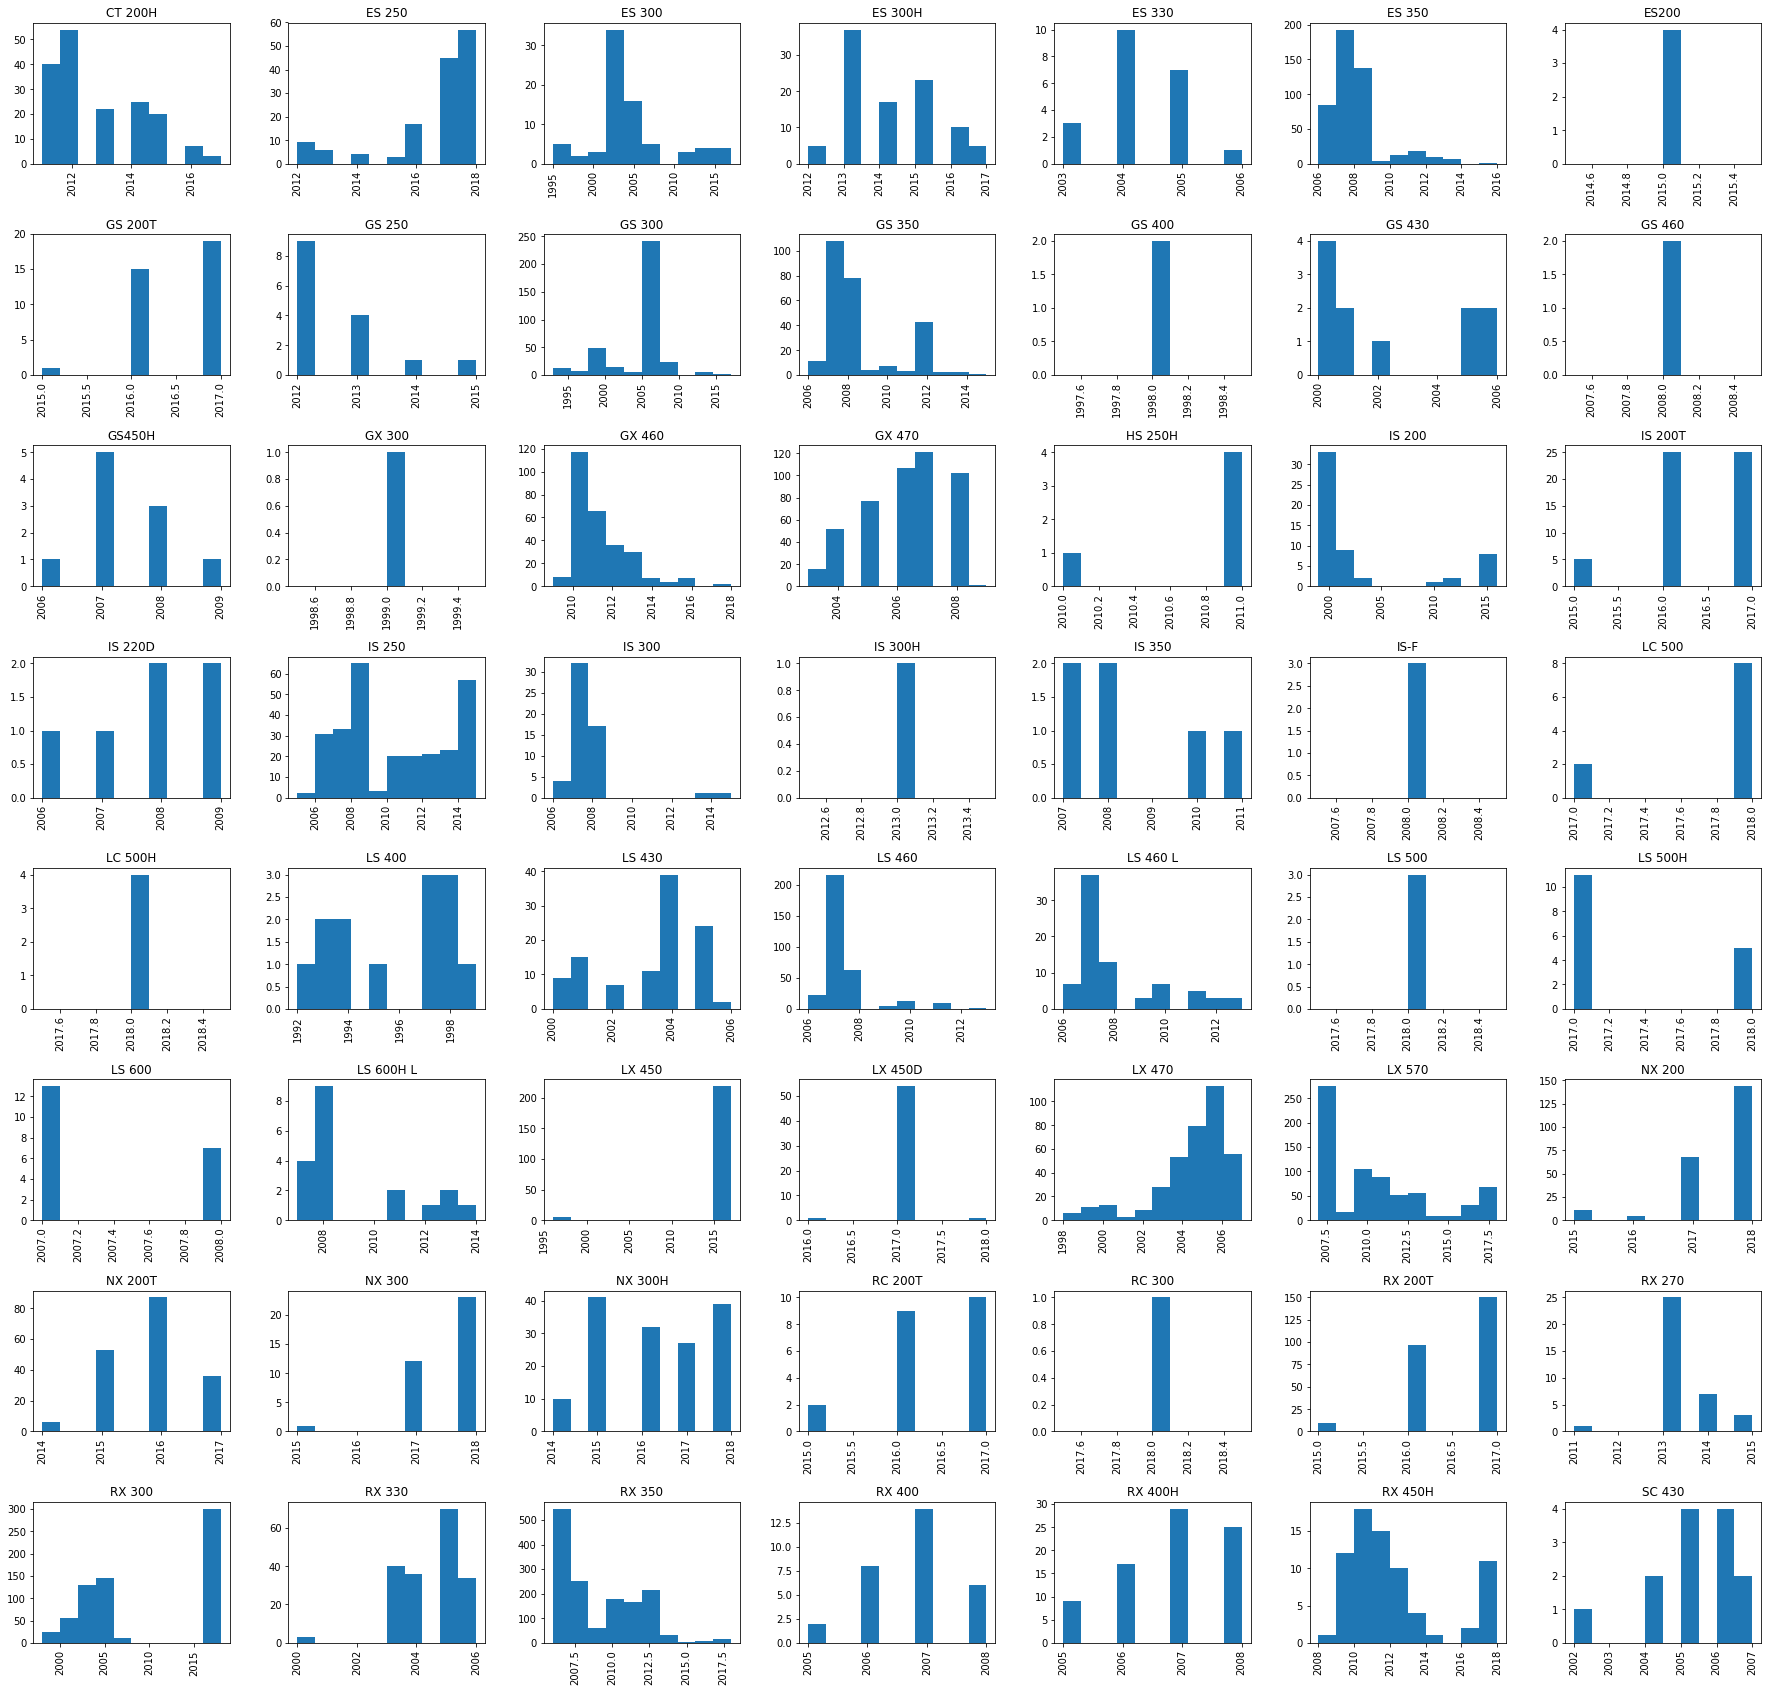

In [267]:
tr[tr.actual_brand=='LEXUS'].hist('make_year', by='model', figsize=(30,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5311fac8>,
      dtype=object)

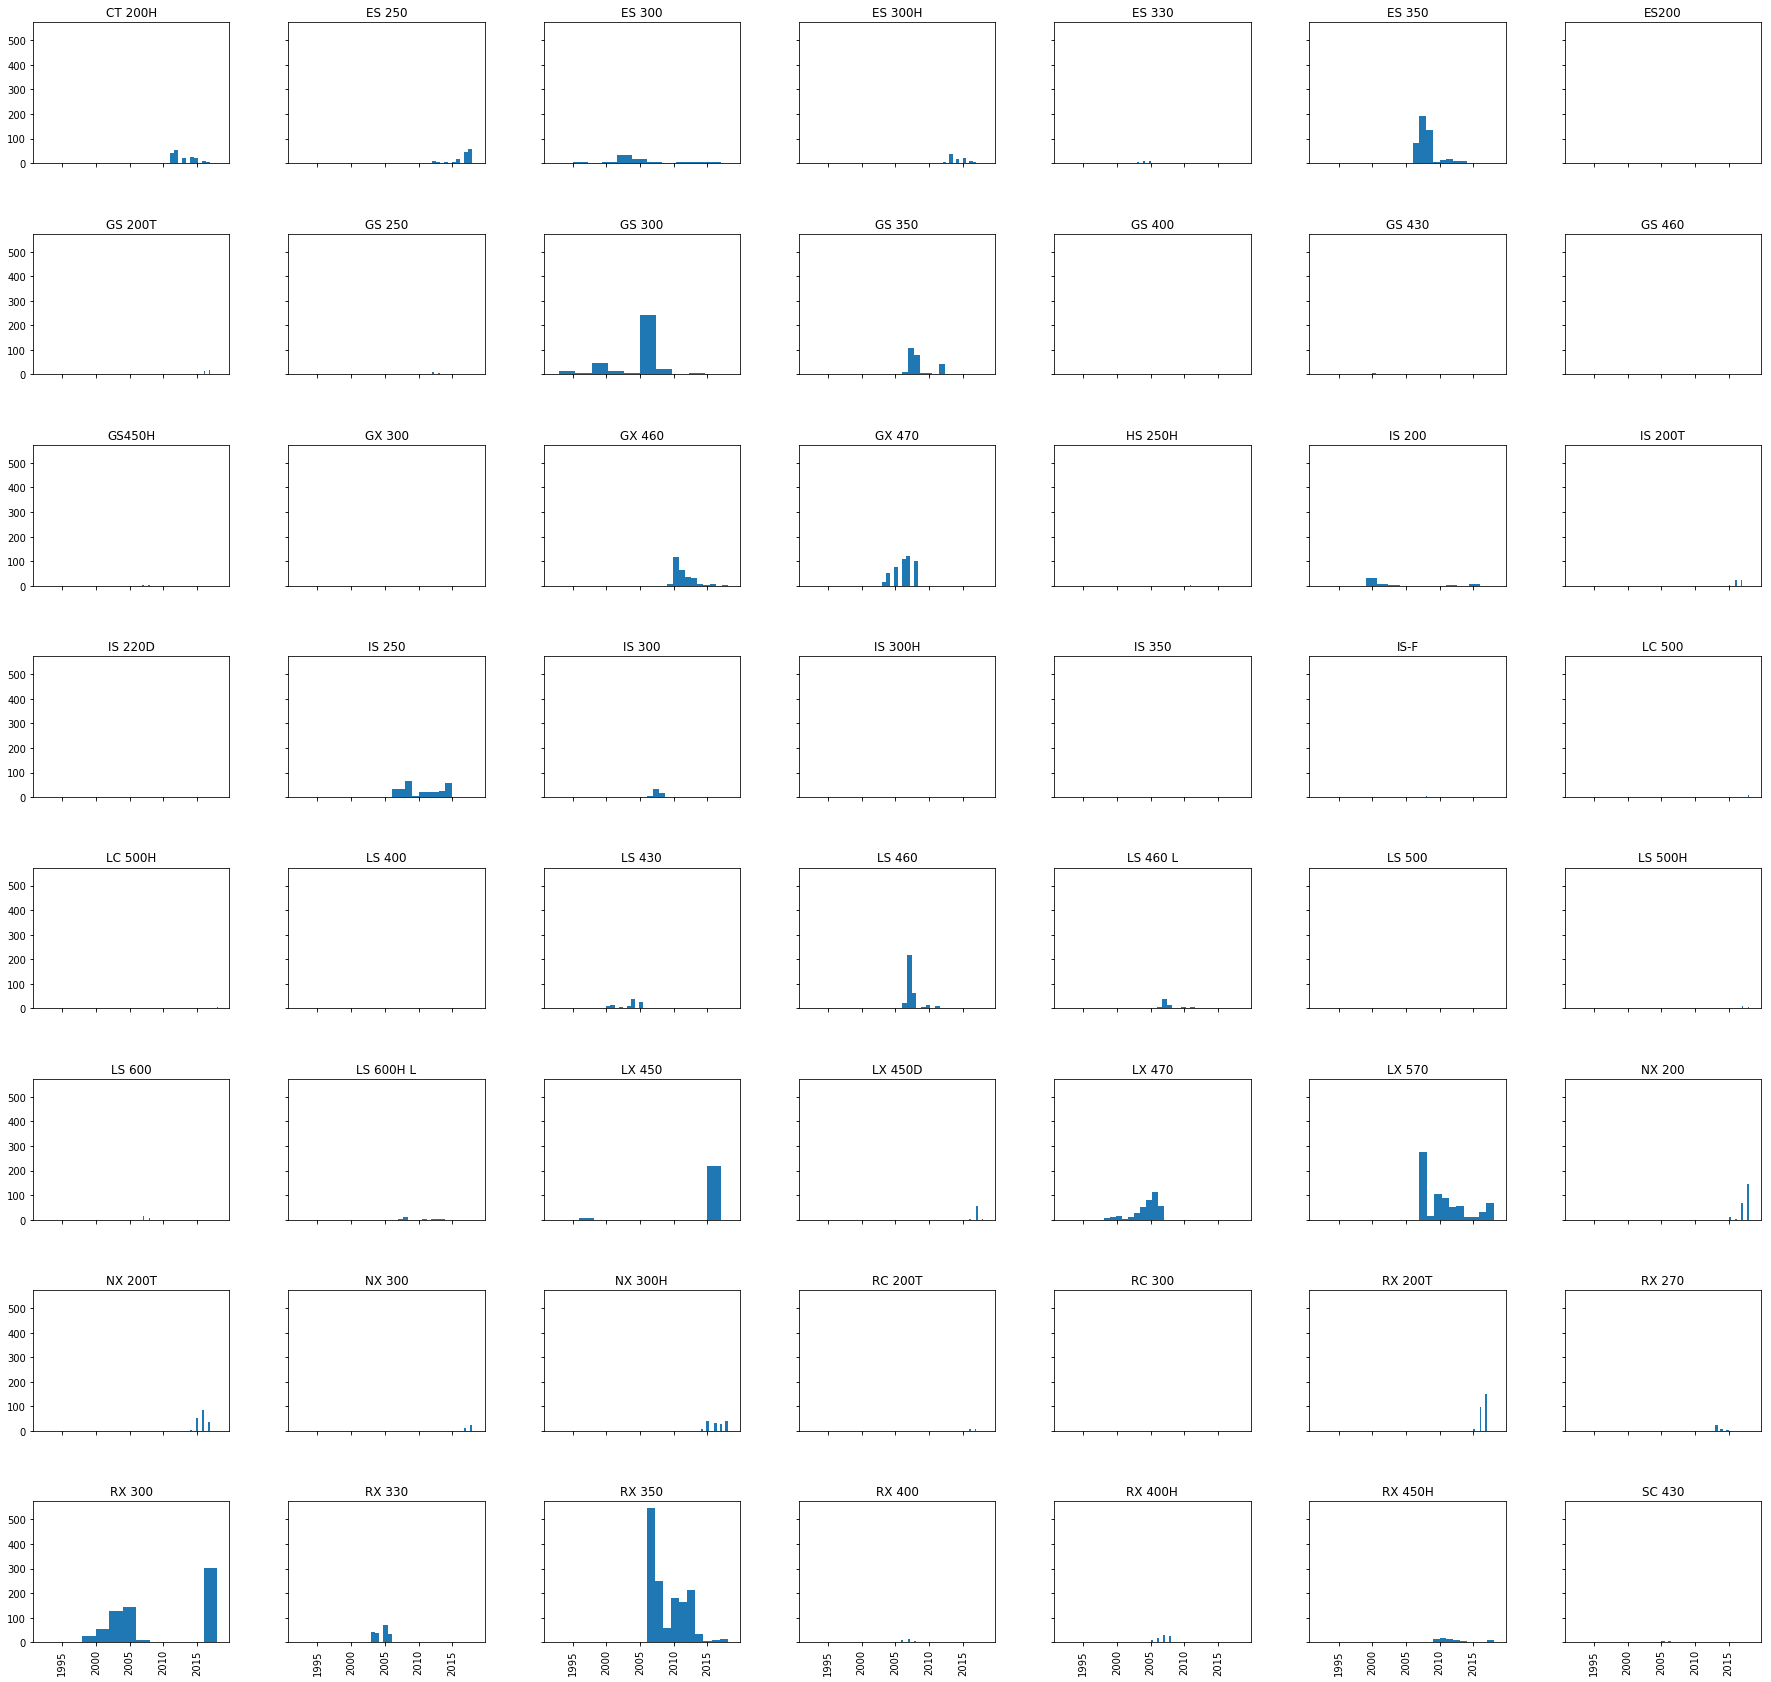

In [268]:
tr[tr.actual_brand=='LEXUS'].hist('make_year', by='model', sharex=True, sharey=True, figsize=(30,30))

In [273]:
tr.tail()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,...,fuel,capacity,own_weight,total_weight,n_reg_new,only_gas,gas,d_reg_dt,actual_brand,age
1022719,P,1.221010e+09,250,250 - ВИДАЧА ТИМЧАСОВОГО РЕЄСТР ТАЛОНУ ПО ДОР...,2018-08-31,1242,ТСЦ 1242,ПАЗ 32054-07,32054-07,2004,...,ДИЗЕЛЬНЕ ПАЛИВО,4750.0,5345.0,8120.0,АЕ5442АА,False,False,2018-09-02 03:18:00,ПАЗ,14
1022720,P,6.510700e+09,13,13 - ВИПРАВЛЕННЯ VIN-КОДУ (ПІСЛЯ ВИПРАВЛЕННЯ ...,2018-08-31,6545,ТСЦ 6545,DAEWOO LANOS,LANOS,2008,...,БЕНЗИН АБО ГАЗ,1498.0,1197.0,1595.0,ВТ0586ВА,False,True,2018-09-02 03:18:00,DAEWOO,10
1022721,P,1.210136e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2018-08-31,1330309,ВРЕР-9 УДАІ В М.КИЄВІ,DAEWOO LANOS TF55Y,LANOS TF55Y,2006,...,БЕНЗИН,1498.0,1080.0,1650.0,04ЕС1027,False,False,2018-09-02 03:18:00,DAEWOO,12
1022722,P,6.520687e+09,540,540 - ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ,2018-08-31,6545,ТСЦ 6545,ГАЗ 53А,53А,1982,...,ДИЗЕЛЬНЕ ПАЛИВО,4750.0,3800.0,7400.0,NaN,False,False,2018-09-02 03:18:00,ГАЗ,36
1022723,J,1.412900e+09,319,319 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ...,2018-08-31,1444,ТСЦ 1444,ВАЗ 21043,21043,2005,...,БЕНЗИН,1451.0,1055.0,1550.0,051630,False,False,2018-09-02 03:18:00,ВАЗ,13


In [272]:
tr['age'] = 2018 - tr.make_year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5af93940>,
      dtype=object)

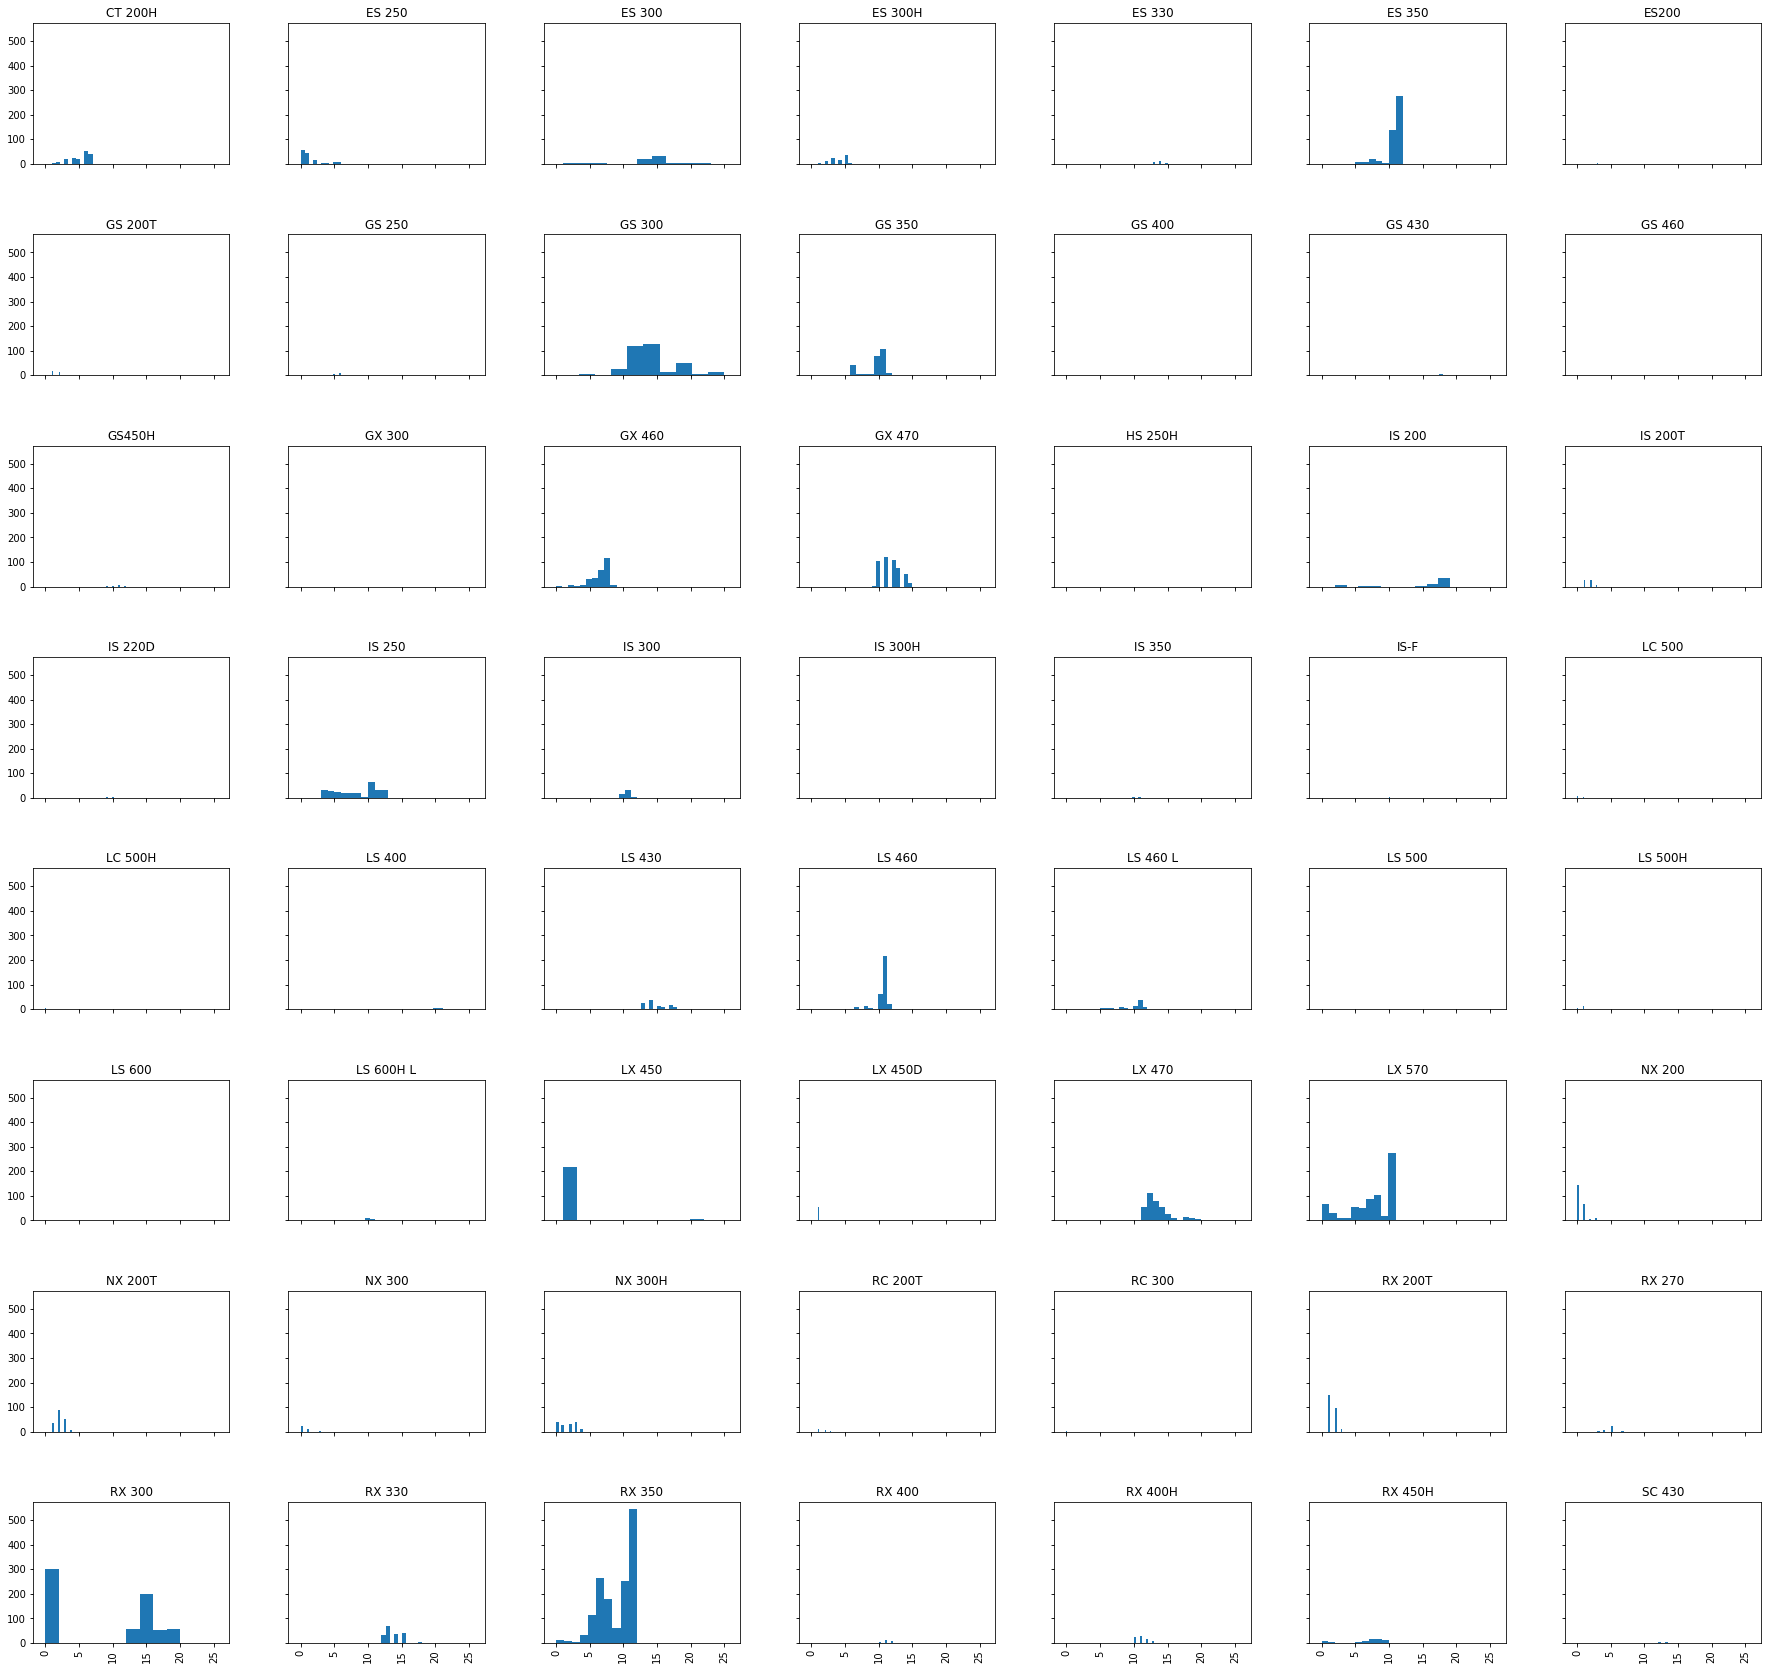

In [274]:
tr[tr.actual_brand=='LEXUS'].hist('age', by='model', sharex=True, sharey=True, figsize=(30,30))

In [289]:
print(tr.capacity.isnull().sum()) # == np.NaN, hmmm... 
tr[['capacity', 'age']].describe()

65911


,capacity,age
count,956813.000000,1.022724e+06
mean,2397.206417,1.219712e+01
std,2334.211265,9.053344e+00
min,0.000000,0.000000e+00
25%,1478.000000,6.000000e+00
50%,1686.000000,1.100000e+01
75%,2349.000000,1.600000e+01
max,42850.000000,1.180000e+02


In [278]:
tr[(tr.age < 6) | (tr.age > 11)].shape

(670619, 24)

In [287]:
tr[(tr.age >= 6) & (tr.age <= 11)].shape

(352105, 24)

In [281]:
tr.groupby('age').size()

age
0      54513
1      54335
2      19213
3      21542
4      30894
5      52235
6      56247
7      56493
8      33919
9      16714
10     98079
11     90653
12     65424
13     47758
14     37744
15     29011
16     20963
17     17712
18     16754
19     16586
20     16879
21     11740
22     11325
23     12323
24     10123
25     10519
26     13607
27     12694
28     12832
29     11713
       ...  
54        94
55        75
56        66
57        64
58        59
59        47
60        49
61        47
62        24
63        38
64        42
65        16
66         9
67        11
68         6
69         4
70         1
71         2
73         1
74         1
75         5
76         2
77         1
78         1
79        12
80         9
81         2
82         4
90         1
118       11
Length: 84, dtype: int64

In [284]:
tr.age.isnull().sum() # hmmm... 

0

In [ ]:
plot